## Proyecto final: Analisis de los datos del Raspberry  
#### Alexia Lillian Cardoso López

Se tomaron datos de Humedad, Presión y Temperatura del 4 al 30 de octubre en donde hay faltantes del 22 al 25 de octubre por errores al conectar el Raspberry.
Con los datos se sacaron los gráficos individuales de cada medida (diagramas de línea y diagramas de dispersión con barra de colores).

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from datetime import datetime

### Código que se uso en Raspberry para la toma de datos
```python
While 1:  
namefile=datetime.now().strftime("%Y-%m-%d")+".csv"  
    if not os.path.exist("/home/computo/Desktop/Datos_SenseHat/"+namefile):  
    f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")  
         f.write("Datetime,Humedad, Temperatura,Presion\r\n")  
         f.close()  
    else:  
        d=open(/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")  
        d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))  
        humidity=sense.get_humidity() 
        temp=sense.get_temperature()  
        pressure=sense.get_pressure()  
        d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))  
        d.close()  
        print("OK")  
        message="T: " + str(temp)+" P: " + str(pressure)+"H: "+str(humidity)  
        sense.show_message(message,scroll_speed=0.10)  
        time.sleep(1800)
```

In [2]:
listfile = glob.glob("2023*.csv")
listfile.sort()

In [3]:
data=[]
for files in listfile:
    data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [4]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S")
datafull=datafull.drop(["Datetime"], axis=1)
datafull.insert(0,"Tiempo", tiempo, True)
datafull=datafull.sort_values(by=["Tiempo"], ignore_index=True)

In [37]:
datafull["Presion"].replace(0, np.nan, inplace=True)

In [38]:
datafull["Presion"].interpolate(method="polynomial",order=2,inplace=True)

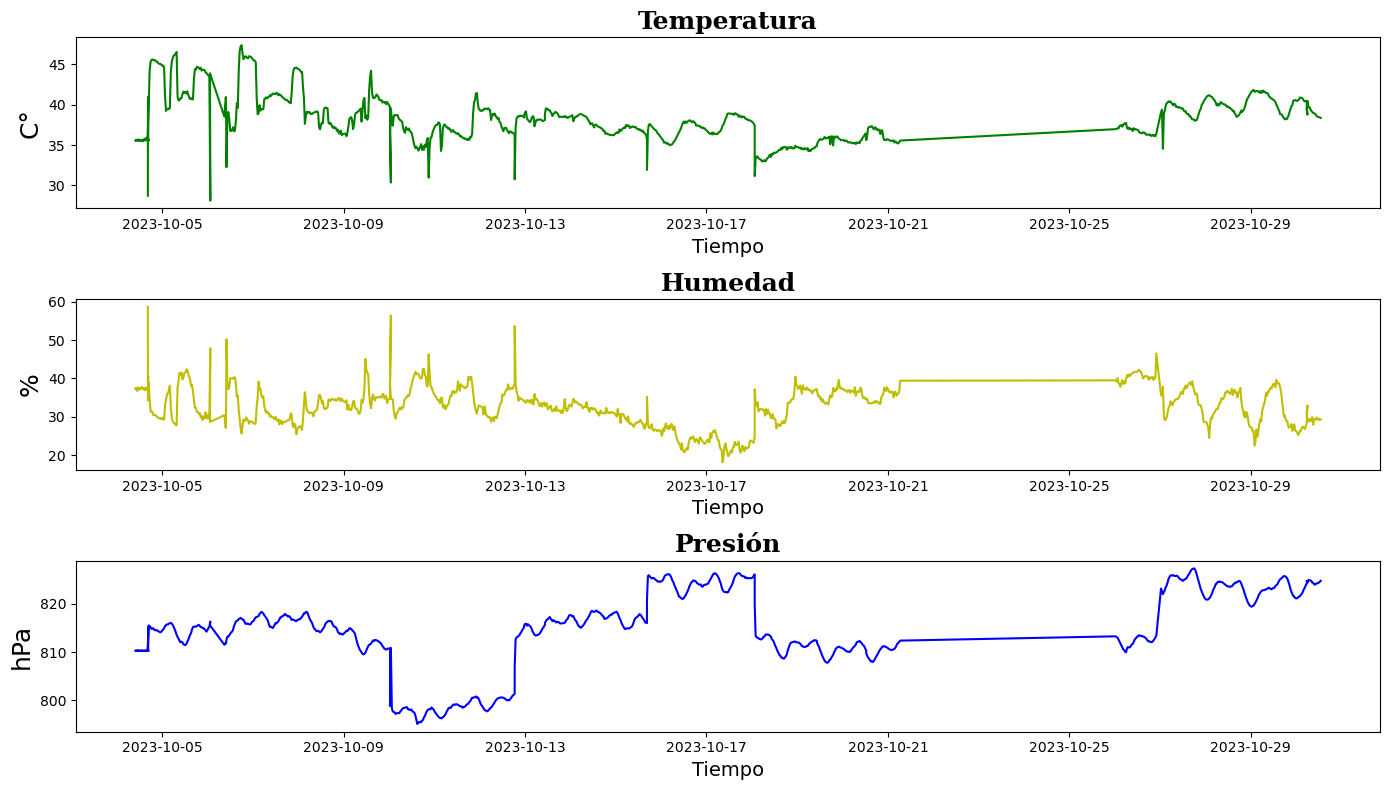

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8))
ax1.set_title("Temperatura",fontsize=18,fontweight="bold",fontfamily="serif")
ax1.set_xlabel("Tiempo",fontsize=14)
ax1.set_ylabel("C°",fontsize=18)
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="g")

ax2.set_title("Humedad",fontsize=18,fontweight="bold",fontfamily="serif")
ax2.set_xlabel("Tiempo",fontsize=14)
ax2.set_ylabel("%",fontsize=18)
ax2.plot(tiempo, datafull["Humedad"], label="Humedad", color="y")

ax3.set_title("Presión",fontsize=18,fontweight="bold",fontfamily="serif")
ax3.set_xlabel("Tiempo",fontsize=14)
ax3.set_ylabel("hPa",fontsize=18)
ax3.plot(tiempo, datafull["Presion"], label="Presion", color="b")

fig.tight_layout()

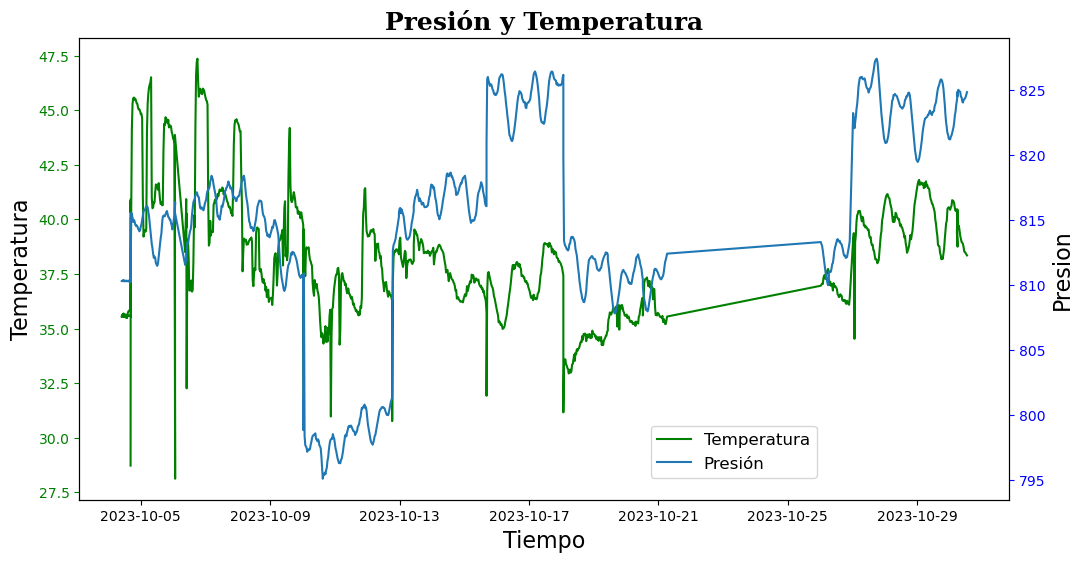

In [8]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Presión y Temperatura",fontsize=18,fontweight="bold",fontfamily="serif")

ax1.set_xlabel("Tiempo",fontsize=16)
ax1.set_ylabel("Temperatura",fontsize=16)
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="g")
ax1.tick_params(axis="y", colors="g")
#ax1.plot(tiempo, datafull["Humedad"],label="Humedad",color="y")

ax2=ax1.twinx()

ax2.set_ylabel("Presion",fontsize=16)
ax2.plot(tiempo, datafull["Presion"],label="Presión")
ax2.tick_params(colors="b")
fig.legend(loc = (0.6,0.15),fontsize=12)

Text(0, 0.5, '%')

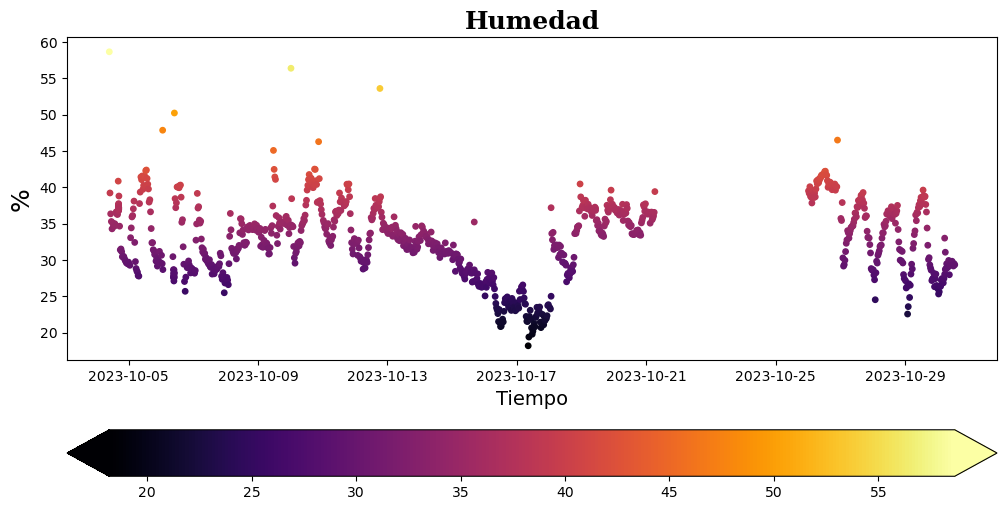

In [104]:
fig,(T)=plt.subplots(figsize=(12,6))
T=plt.scatter(datafull['Tiempo'], datafull['Humedad'], c=datafull['Humedad'], cmap='inferno',s=15)
plt.colorbar(T,orientation="horizontal",extend="both")
plt.title("Humedad",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("%",fontsize=18)

Text(0, 0.5, 'C°')

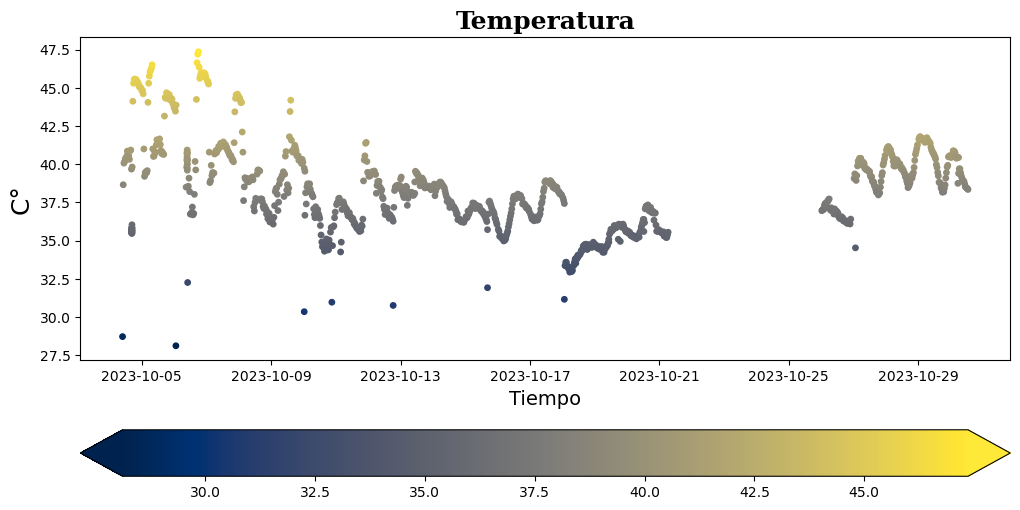

In [108]:
fig,(T)=plt.subplots(figsize=(12,6))
T=plt.scatter(datafull['Tiempo'], datafull[' Temperatura'], c=datafull[' Temperatura'], cmap='cividis',s=15)
plt.colorbar(T,orientation="horizontal",extend="both")
plt.title("Temperatura",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("C°",fontsize=18)

Text(0, 0.5, 'hPa')

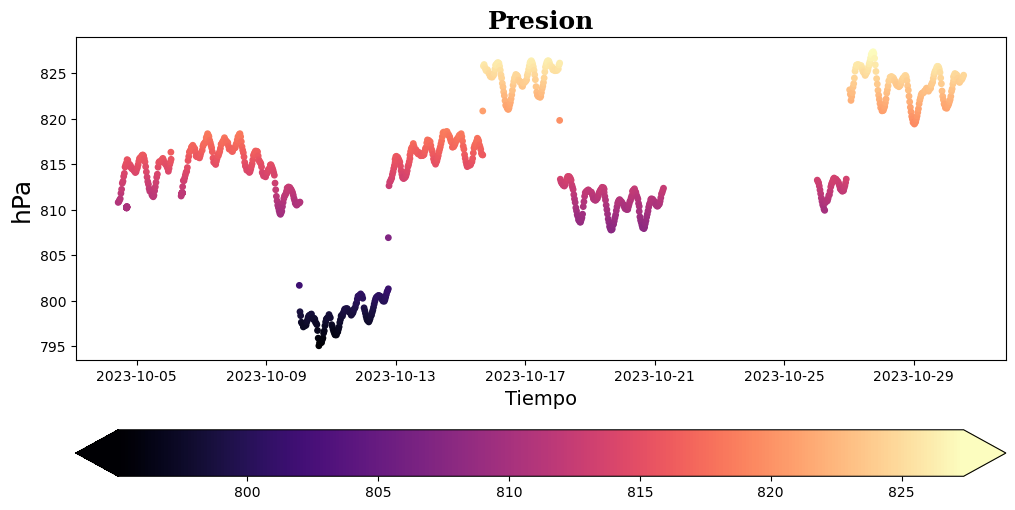

In [105]:
fig,(T)=plt.subplots(figsize=(12,6))
T=plt.scatter(datafull['Tiempo'], datafull['Presion'], c=datafull['Presion'], cmap='magma',s=15)
plt.colorbar(T,orientation="horizontal",extend="both")
plt.title("Presion",fontsize=18,fontweight="bold",fontfamily="serif")
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("hPa",fontsize=18)